In [1]:
#json_parser 불러오기

from json_parser import json_loader, json_parser_to_pd

data_path = "data/XAPI_npe_1215.json"
#data_path = "data2/XAPI_5d933d.json" <- 데이터를 변경해도 잘 들어가는 것을 확인할 수 있음

json_data = json_loader(data_path)

In [2]:
df_data = json_parser_to_pd(json_data)

결측치 확인:  actor        0
object       0
verb         0
timestamp    0
dtype: int64


In [3]:
df_data.head()

,actor,object,verb,timestamp
0,learner10,삼양문화 진로교육연구원 영화로 떠나는 진로여행 첫 번째_그릿(GRIT),시청기록,2021-12-14T18:33:42.326
1,learner10,삼양문화 진로교육연구원 영화로 떠나는 진로여행 첫 번째_그릿(GRIT),시청중,2021-12-14T18:33:43.406
2,learner10,삼양문화 진로교육연구원 영화로 떠나는 진로여행 첫 번째_그릿(GRIT),실행,2021-12-14T18:33:45.010
3,learner10,삼양문화 진로교육연구원 영화로 떠나는 진로여행 첫 번째_그릿(GRIT),시청중,2021-12-14T18:33:46.410
4,learner10,삼양문화 진로교육연구원 영화로 떠나는 진로여행 첫 번째_그릿(GRIT),시청중,2021-12-14T18:33:47.424


In [4]:
from xAPI_Analyzer import Analyzer

xAPI_analyzer = Analyzer(df_data)

# 1. 활동량 분석

In [5]:
students, total_logs = xAPI_analyzer.analyze_activities()

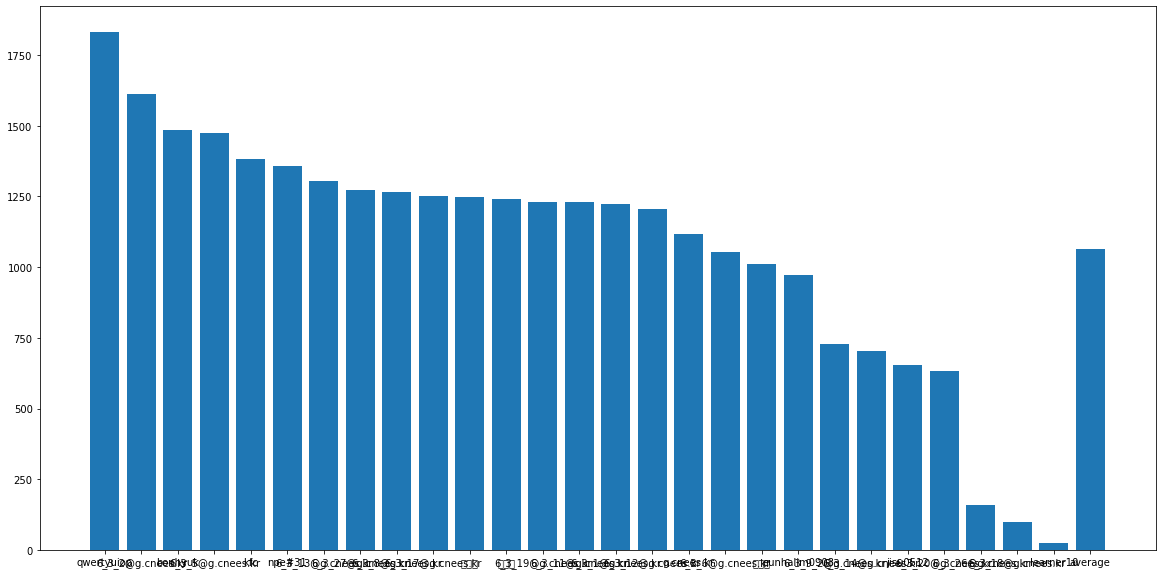

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.figure(figsize = (20, 10))
plt.bar(students, total_logs)
plt.show()

# 2. 시청 행동 분석

In [7]:
unique_actor, data_list = xAPI_analyzer.analyze_watching_time()

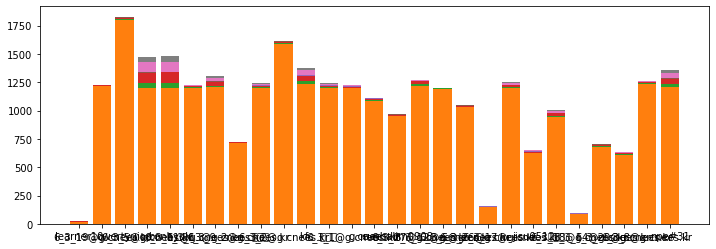

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

X = unique_actor

plt.figure(figsize = (12, 4))

plt.bar(X, data_list[0])
plt.bar(X, data_list[1], bottom = data_list[0])
plt.bar(X, data_list[2], bottom = data_list[0] + data_list[1])
plt.bar(X, data_list[3], bottom = data_list[0] + data_list[1] + data_list[2])
plt.bar(X, data_list[4], bottom = data_list[0] + data_list[1] + data_list[2] + data_list[3])
plt.bar(X, data_list[5], bottom = data_list[0] + data_list[1] + data_list[2] + data_list[3] + data_list[4])
plt.bar(X, data_list[6], bottom = data_list[0] + data_list[1] + data_list[2] + data_list[3] + data_list[4] + data_list[5])
plt.bar(X, data_list[7], bottom = data_list[0] + data_list[1] + data_list[2] + data_list[3] + data_list[4] + data_list[5] + data_list[6])

plt.show()

# 3. 개인별 영상 시청 행동 분석